# No More Alzheimer's Disease

## General Data Processing

### Data Downloading

In [1]:
import sys
fields_to_drop = ['RID', 'VISCODE', 'MMSE', 'PTEDUCAT', 'AGE']

### SVM Approach

Use Cross Validation to find what parameters suit this problem the best

In [2]:
%reload_ext autoreload
%autoreload 2
sys.path.append("../../../../..")
from Classifiers.MySVM import MySVM

Best Parameters:  {'C': 1000, 'decision_function_shape': 'ovr', 'degree': 2, 'kernel': 'linear'}
Best Score:  0.5415204678362573


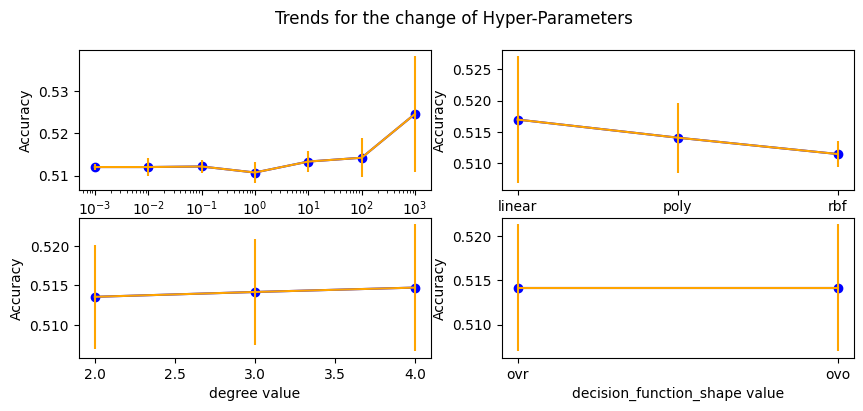

In [3]:
svm = MySVM("data.csv", fields_to_drop)
svm.hyper_parameter_selection()

## Test for these hyper-parameters

In [4]:
svm.test(True)

Accuracy is 0.4719626168224299
+-----------+-----------+----------+----------+
|           |       SCD |      MCI |       AD |
+===========+===========+==========+==========+
| Recall    | 0.04      | 0.841121 | 0.25     |
+-----------+-----------+----------+----------+
| Precision | 0.25      | 0.483871 | 0.5      |
+-----------+-----------+----------+----------+
| F1 Score  | 0.0689655 | 0.614334 | 0.333333 |
+-----------+-----------+----------+----------+


# Random Forest Approach

In [5]:
%reload_ext autoreload
%autoreload 2
from Classifiers.MyRF import MyRF

Computing Results.......
Best Parameters:  {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'log_loss', 'n_estimators': 100}
Best Score:  0.5052631578947369


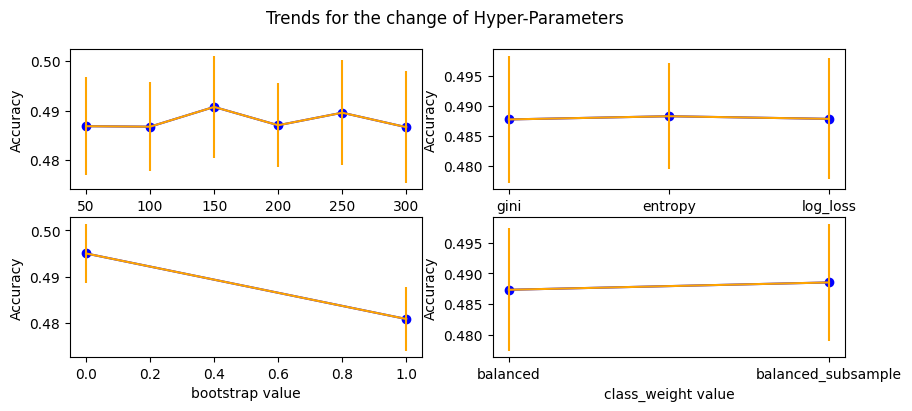

In [6]:
# Before Removing Outliers
print("Computing Results.......")
rf = MyRF("data.csv", fields_to_drop)
rf.hyper_parameter_selection()

In [7]:
# Display the test results for this data
rf.test(True)

Accuracy is 0.514018691588785
+-----------+----------+----------+------+
|           |      SCD |      MCI |   AD |
+===========+==========+==========+======+
| Recall    | 0.32     | 0.654206 |  0.5 |
+-----------+----------+----------+------+
| Precision | 0.5      | 0.522388 |  0.5 |
+-----------+----------+----------+------+
| F1 Score  | 0.390244 | 0.580913 |  0.5 |
+-----------+----------+----------+------+


## Relative Feature Importances

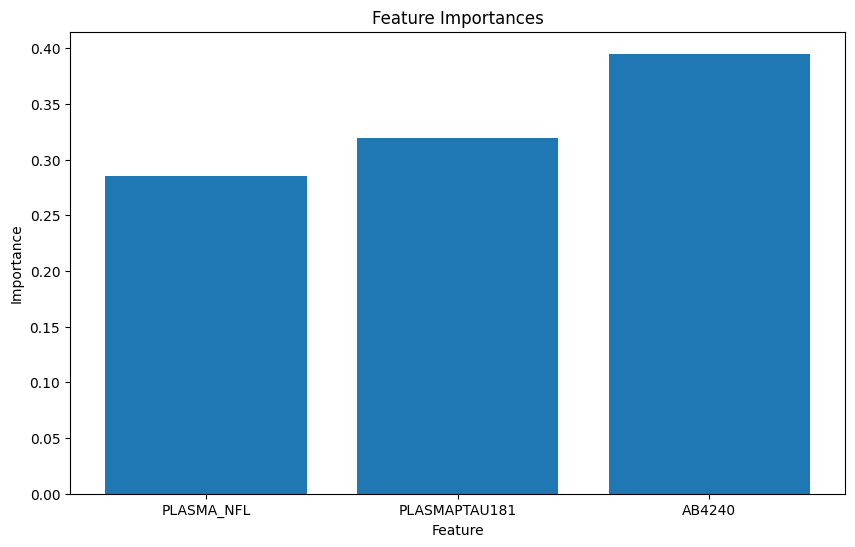

In [8]:
# Get the importance of each feature in this classifier
rf.relative_importance()